# Exploratory Data Analysis
Wohoooo Lessgoooo!!
We are kicking off the Spring of Data with Exploratory Data Analysis! Here we are going understand the steps involved in Exploratory Data Analysis phase of the Data cycle.
<br>We are going to be using the [Car Features and MSRP](https://www.kaggle.com/datasets/CooperUnion/cardataset) dataset from Kaggle.
Here we are going to perform steps from EDA and the resulting data will be clean and ready to use for <b>feature selection</b> or the <b>machine learning model.</b>


## Loading Data

### Import Libraries

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [150]:
# Load the dataset
path = "./dataset/data.csv"

data = pd.read_csv(path, header=0)

data.head(25)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


## Understanding the data
We understand the structure of the data, the number of entries, the number and types of features etc.

In [153]:
data.shape  # Gives the shape of the dataframe

(11914, 16)

In [155]:
data.info()  # Gives us information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [157]:
data.describe() # Gives mathematical insight in the data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Cleaning the Data
In this step we are going to weed out stuff we don't need. Any columns that we think won't contribute any information, duplicates and null values.

### Dropping irrelevant columns
To me columns like Popularity, Make, Model, Number of dooors and Market category does not make sense. I guess there's a case for Market category but let's get to it later.

In [161]:
data = data.drop(['Make', 'Model', 'Number of Doors', 'Market Category', 'Popularity'], axis=1) # We specified axis=1 to drop columns. We can drop rows as well
data.head(5)

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


### Removing duplicates

In [164]:
# Let's check how many duplicates we have

dup = data[data.duplicated()]
print("The number of duplicate rows are :", dup.shape[0])

The number of duplicate rows are : 801


In [166]:
# Now let's drop them

data = data.drop_duplicates()
print("Final number of rows are: ", data.shape[0])
data.head(5)

Final number of rows are:  11113


,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


### Make things easy.
I am going to rename the columns.

In [169]:
data = data.rename(columns={'Engine Fuel Type':'Fuel',
                            'Engine HP':'HP',
                            'Engine Cylinders': 'Cylinders',
                            'Transmission Type': 'Transmission',
                            'Driven_Wheels': 'Drive',
                            'Vehicle Size': 'Size',
                            'Vehicle Style': 'Style',
                            'highway MPG': 'MPG-H',
                            'city mpg': 'MPG-C'
                           })
data.head(5)

,Year,Fuel,HP,Cylinders,Transmission,Drive,Size,Style,MPG-H,MPG-C,MSRP
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


## Handling NaN values
Now we look at how many rows with null values we have and which of these columns is contributing to the null value count.

In [172]:
# Let's see how isnull works
print(data.isnull().sum())
data.isnull().head(5)

Year             0
Fuel             3
HP              69
Cylinders       30
Transmission     0
Drive            0
Size             0
Style            0
MPG-H            0
MPG-C            0
MSRP             0
dtype: int64


,Year,Fuel,HP,Cylinders,Transmission,Drive,Size,Style,MPG-H,MPG-C,MSRP
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [174]:
# We are going to drop these because there only like a max possible 99 items in around 11k items that have Nan.
data = data.dropna()
data.count()

Year            11012
Fuel            11012
HP              11012
Cylinders       11012
Transmission    11012
Drive           11012
Size            11012
Style           11012
MPG-H           11012
MPG-C           11012
MSRP            11012
dtype: int64

## Detecting Outliers
Now we'll check out how many outliers we have using boxplots. Looking at their number and amount will help us decide how we should deal with them. Usually we have utliers only in the numerical columns, especially since properties like inter-quartile range, mean, etc can only be defined for numeric data.

In [177]:
# Let's get the numerical columns
data_numeric = data.select_dtypes(include='number')
data_numeric.head(5)

,Year,HP,Cylinders,MPG-H,MPG-C,MSRP
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500


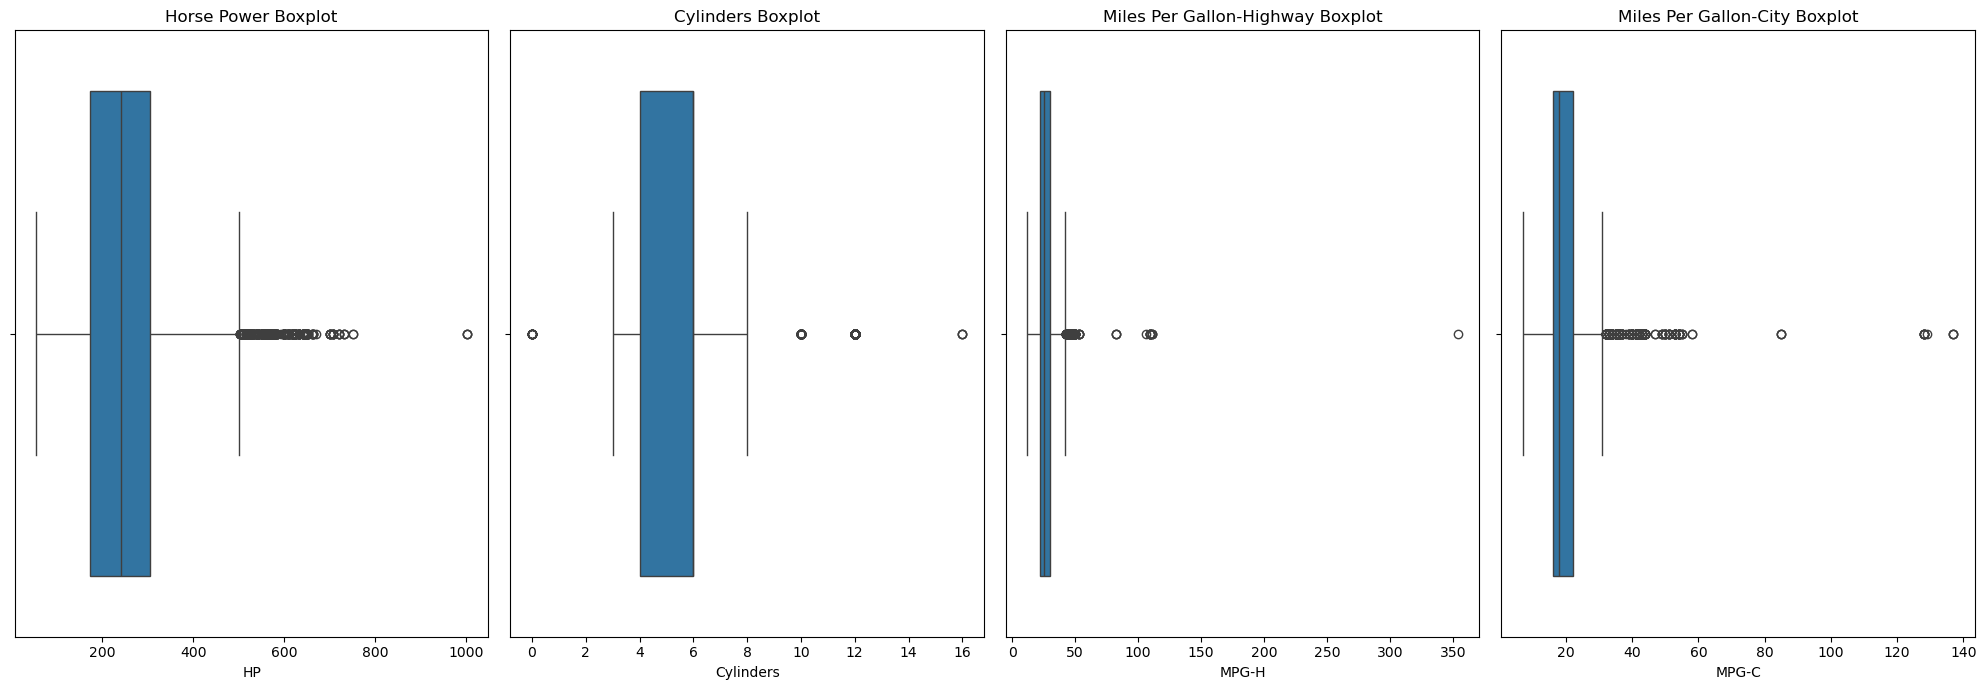

In [217]:
# Let's get the box plot

fig, axes = plt.subplots(1, 4,figsize=(20, 7))

sns.boxplot(x=data_numeric['HP'], ax=axes[0])
axes[0].set_title("Horse Power Boxplot")

sns.boxplot(x=data_numeric['Cylinders'], ax=axes[1])
axes[1].set_title("Cylinders Boxplot")

sns.boxplot(x=data_numeric['MPG-H'], ax=axes[2])
axes[2].set_title("Miles Per Gallon-Highway Boxplot")

sns.boxplot(x=data_numeric['MPG-C'], ax=axes[3])
axes[3].set_title("Miles Per Gallon-City Boxplot")

plt.tight_layout()
plt.show()

In [221]:
# We are using the inter-quartile range method to remove outliers
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.00
HP             132.00
Cylinders        2.00
MPG-H            8.00
MPG-C            6.00
MSRP         21601.25
dtype: float64


In [237]:
data_final = data_numeric[~((data_numeric < Q1 - (1.5 * IQR)) | (data_numeric > Q3 + (1.5 * IQR))).any(axis=1)]
data_final.shape

(9320, 6)

# Final Analyses
Here we perform univariate and bivariate analyses.

## Univariate Analysis

<Figure size 1200x400 with 0 Axes>

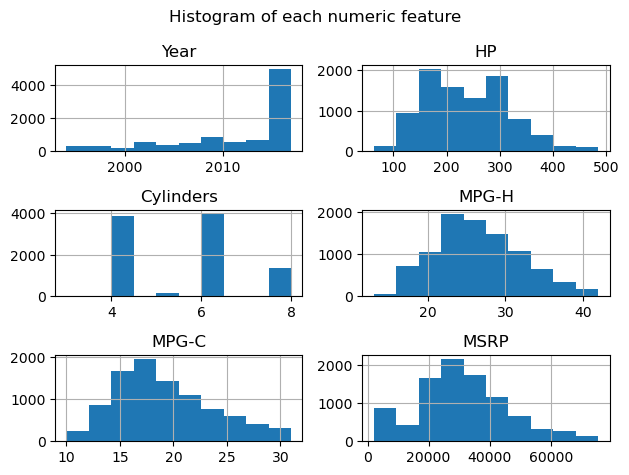

In [251]:
plt.figure(figsize=(12,4))
data_final.hist()
plt.suptitle("Histogram of each numeric feature")
plt.tight_layout()
plt.show()

## Bivariate Analysis

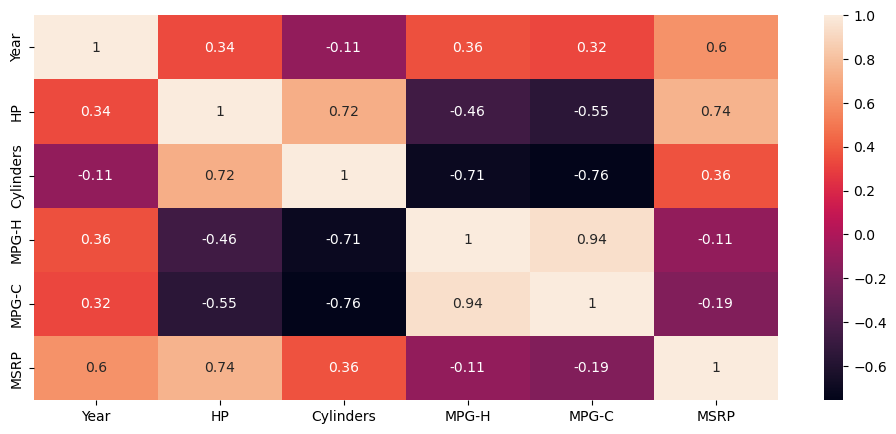

In [253]:
plt.figure(figsize=(12,5))
CR = data_final.corr()
sns.heatmap(CR, annot=True)
plt.show()

From this we see that Horse Power correlates to MSRP positively!

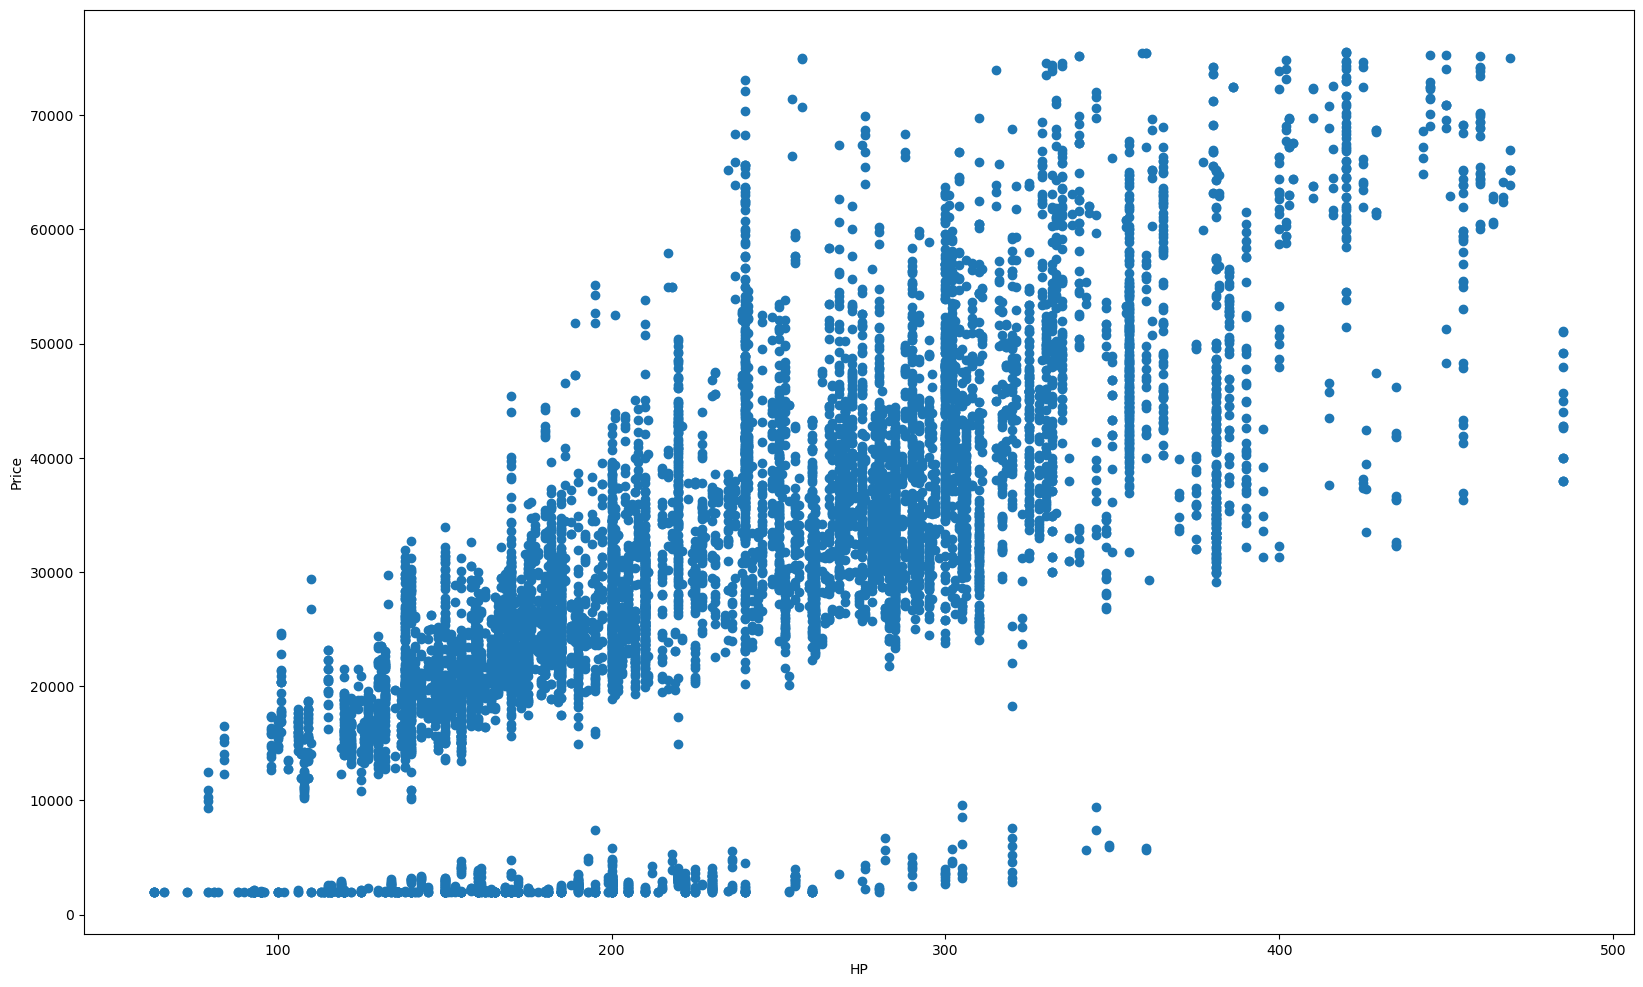

In [259]:
fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(data_final['HP'],data_final['MSRP'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()